In [ ]:
!pip3 install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [1]:
import gdown
gdown.download(
    f"https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM",
    output= 'GoogleNews-vectors-negative300.bin.gz',quiet=False
)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:14<00:00, 112MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)


In [ ]:
model.word_vec('United_States')

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

In [ ]:
model.most_similar('United_States', topn=10)


[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [ ]:
vec = model['Spain'] - model['madrid'] + model['Athens'] 
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)


[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-12-23 06:07:09--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.63.128, 2607:f8b0:4004:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.63.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2022-12-23 06:07:09 (227 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [ ]:
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


In [ ]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


In [2]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2022-12-27 07:19:13--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2022-12-27 07:19:13--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.04s   

2022-12-27 07:19:13 (530 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [ ]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
ws353 = []
with open('./combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

# 確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685


In [ ]:
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [ ]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Slovakia, Greenland, Jordan, Georgia, Ireland, Denmark, Slovenia, Italy, Hungary, Bulgaria, Macedonia, Latvia, Poland, Lithuania, Norway, Spain, Greece, Israel, Iceland, Turkey, Serbia, Finland, Liechtenstein, Sweden, Croatia, Austria, Montenegro, Switzerland, Cyprus, Europe, Netherlands, Albania, England, Germany, Romania, Belgium, Portugal, Malta, Estonia, France, USA
cluster 1
Bangladesh, Philippines, Oman, Fiji, Vietnam, Laos, Bhutan, Australia, Japan, Qatar, Cambodia, Indonesia, Thailand, India, Bahrain, Malaysia, Nepal, Tuvalu, Korea, Taiwan, China
cluster 2
Suriname, Samoa, Chile, Honduras, Canada, Brazil, Dominica, Uruguay, Peru, Argentina, Nicaragua, Colombia, Venezuela, Belize, Bahamas, Mexico, Cuba, Ecuador, Guyana, Jamaica
cluster 3
Niger, Somalia, Gambia, Morocco, Namibia, Mali, Liberia, Kenya, Zambia, Uganda, Malawi, Iraq, Botswana, Sudan, Eritrea, Lebanon, Rwanda, Algeria, Mauritania, Angola, Ghana, Mozambique, Guinea, Madagascar, Egypt, Gabon, Libya, Burundi, 

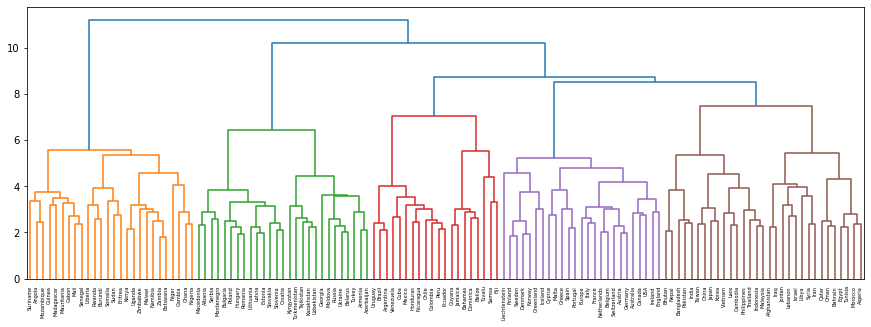

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

In [ ]:
!pip install bhtsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 7.0 MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp38-cp38-linux_x86_64.whl size=221021 sha256=e3b683b5f1d66e6ff9367790562425d750ec81085c395202d927a2a761bda50b
  Stored in directory: /root/.cache/pip/wheels/aa/c7/a8/6d827fea433c4238dad92d6012d1f5249e8af6e7cf020cabe1
Successfully built bhtsne


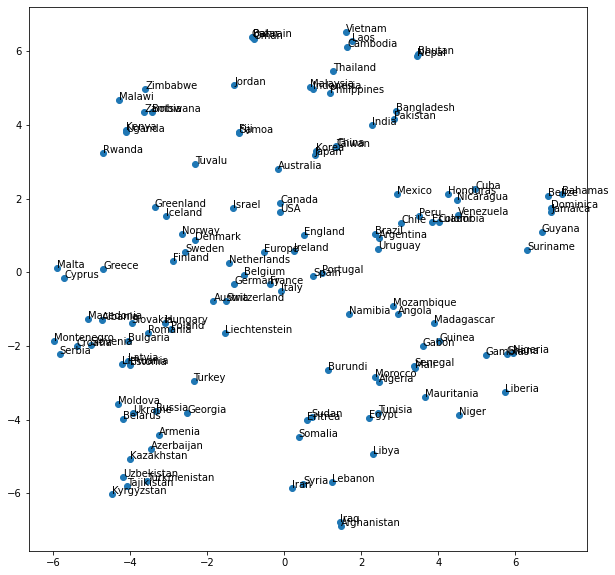

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()